In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv", parse_dates=['test_date'], index_col="test_date")
df = df.sort_index()

D:\tmp\ipykernel_22212\3469283121.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv", parse_dates=['test_date'], index_col="test_date")


In [3]:
df_limited = df.loc["2020-03-11":"2020-04-07"]

In [4]:
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116444 entries, 2020-03-11 to 2020-04-07
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                116192 non-null  float64
 1   fever                116192 non-null  float64
 2   sore_throat          116443 non-null  float64
 3   shortness_of_breath  116443 non-null  float64
 4   head_ache            116443 non-null  float64
 5   corona_result        116444 non-null  object 
 6   age_60_and_above     111932 non-null  object 
 7   gender               100455 non-null  object 
 8   test_indication      116444 non-null  object 
dtypes: float64(5), object(4)
memory usage: 8.9+ MB


In [5]:
df_limited.describe()

cough          fever    sore_throat  shortness_of_breath  \
count  116192.000000  116192.000000  116443.000000        116443.000000   
mean        0.145079       0.081873       0.014952             0.012538   
std         0.352182       0.274172       0.121359             0.111271   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         1.000000       1.000000       1.000000             1.000000   

           head_ache  
count  116443.000000  
mean        0.018636  
std         0.135235  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [6]:
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116444 entries, 2020-03-11 to 2020-04-07
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                116192 non-null  float64
 1   fever                116192 non-null  float64
 2   sore_throat          116443 non-null  float64
 3   shortness_of_breath  116443 non-null  float64
 4   head_ache            116443 non-null  float64
 5   corona_result        116444 non-null  object 
 6   age_60_and_above     111932 non-null  object 
 7   gender               100455 non-null  object 
 8   test_indication      116444 non-null  object 
dtypes: float64(5), object(4)
memory usage: 8.9+ MB


In [7]:
def filter(df):
    df_filtered = df[df["corona_result"] != "other"].copy()
    
    df_filtered["age_60_and_above"] = df_filtered["age_60_and_above"].map({
        "No": 0, 
        "Yes": 1,
    })

    df_filtered["corona_result"] = df_filtered["corona_result"].map({
        "negative": 0, 
        "positive": 1
    })
    df_filtered["gender"] = df_filtered["gender"].map({
        "male": 0, 
        "female": 1
    })
    df_filtered["test_indication"] = df_filtered["test_indication"].map({
        "Other": 1, 
        "Abroad": 2,
        "Contact with confirmed": 3
    })
    
    df_filtered = df_filtered.drop(columns=["age_60_and_above", "gender"])
    
    df_filtered.dropna(inplace=True)
    
    # Convert columns to appropriate types
    # df_filtered["age_60_and_above"] = df_filtered["age_60_and_above"].astype(int)
    # df_filtered["corona_result"] = df_filtered["corona_result"].astype(int)
    # df_filtered["gender"] = df_filtered["gender"].astype(int)
    # df_filtered["test_indication"] = df_filtered["test_indication"].astype(int)
    
    return df_filtered


In [8]:
df_filtered = filter(df_limited)

In [9]:
df_filtered.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
test_indication        0
dtype: int64

In [10]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114687 entries, 2020-03-11 to 2020-04-07
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                114687 non-null  float64
 1   fever                114687 non-null  float64
 2   sore_throat          114687 non-null  float64
 3   shortness_of_breath  114687 non-null  float64
 4   head_ache            114687 non-null  float64
 5   corona_result        114687 non-null  int64  
 6   test_indication      114687 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 7.0 MB


In [11]:
X = df_filtered.drop(columns=["corona_result"])
y = df_filtered["corona_result"]
X_validate = X.loc["2020-04-01":"2020-04-07"]
y_validate = y.loc["2020-04-01":"2020-04-07"]

In [12]:
X_train = X.loc["2020-03-11":"2020-03-21"]
y_train = y.loc["2020-03-11":"2020-03-21"]
X_test = X.loc["2020-03-22":"2020-03-30"]
y_test = y.loc["2020-03-22":"2020-03-30"]

In [30]:
X_train.shape, X_test.shape, X_validate.shape

((13448, 6), (45924, 6), (48236, 6))

(array([18336., 18343., 18353., 18360., 18367., 18374., 18383.]),
 [Text(18336.0, 0, '2020-03-15'),
  Text(18343.0, 0, '2020-03-22'),
  Text(18353.0, 0, '2020-04-01'),
  Text(18360.0, 0, '2020-04-08'),
  Text(18367.0, 0, '2020-04-15'),
  Text(18374.0, 0, '2020-04-22'),
  Text(18383.0, 0, '2020-05-01')])

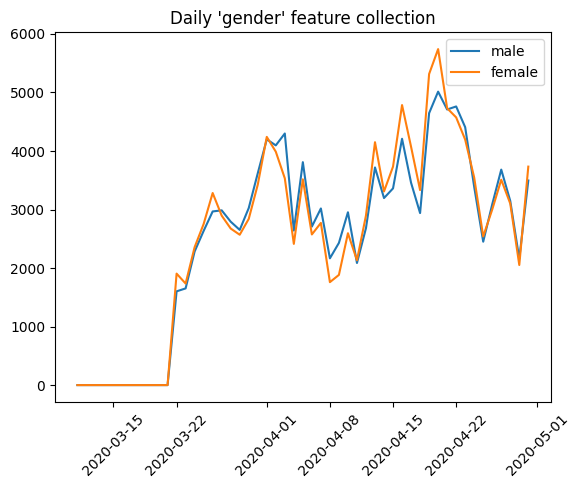

In [13]:
df_gender = df[['gender']].copy()
df_gender['male'] = 0
df_gender['female'] = 0
df_gender['male'] = df['gender'].apply(lambda x: 1 if pd.notna(x) and x.lower() == 'male' else 0)
df_gender['female'] = df['gender'].apply(lambda x: 1 if pd.notna(x) and x.lower() == 'female' else 0)

df_gender = df_gender[["male", "female"]].groupby(df_gender.index.date).sum()

df_gender.plot()
plt.title("Daily 'gender' feature collection")
plt.xticks(rotation=45)

(array([18336., 18343., 18353., 18360., 18367., 18374., 18383.]),
 [Text(18336.0, 0, '2020-03-15'),
  Text(18343.0, 0, '2020-03-22'),
  Text(18353.0, 0, '2020-04-01'),
  Text(18360.0, 0, '2020-04-08'),
  Text(18367.0, 0, '2020-04-15'),
  Text(18374.0, 0, '2020-04-22'),
  Text(18383.0, 0, '2020-05-01')])

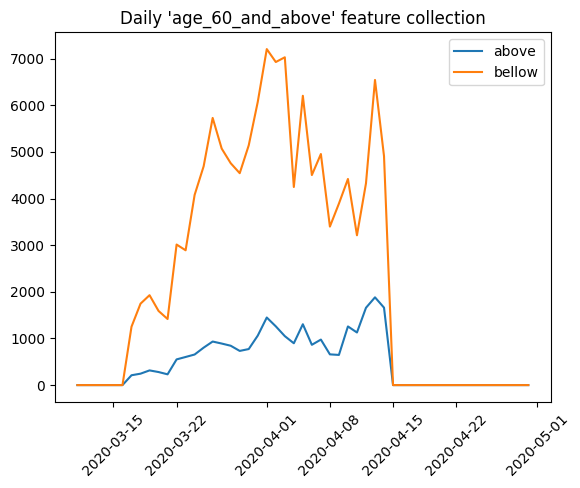

In [14]:
df_age_60_and_above = df[["age_60_and_above"]].copy()
df_age_60_and_above["above"] = 0
df_age_60_and_above["bellow"] = 0
df_age_60_and_above["above"] = df["age_60_and_above"].apply(lambda x: 1 if pd.notna(x) and x.lower() == "yes" else 0)
df_age_60_and_above["bellow"] = df["age_60_and_above"].apply(lambda x: 1 if pd.notna(x) and x.lower() == "no" else 0)

df_age_60_and_above = df_age_60_and_above[["above", "bellow"]].groupby(df_age_60_and_above.index.date).sum()

df_age_60_and_above.plot()
plt.title("Daily 'age_60_and_above' feature collection")
plt.xticks(rotation=45)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

params = {
    "max_depth": [None, 3, 5, 7],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 2, 3],
    "class_weight": ["balanced"],
    "max_samples": [0.10, 0.25, 0.35],
    "max_features": [0.3, 0.5, 0.7],
    "n_estimators": [70, 100, 150]
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

gcv = GridSearchCV(rf_model, param_grid=params, n_jobs=-1, verbose=2)

gcv.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


d:\Codes\Python\Cambridge_spark\12_Hackathon\.env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 3, 5],
                         'max_features': [0.2, 0.5, 0.8],
                         'max_samples': [0.25, 0.35, 0.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

Running time: 11 mins

In [16]:
gcv.best_params_

{'class_weight': 'balanced',
 'max_depth': 5,
 'max_features': 0.5,
 'max_samples': 0.25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [17]:
rf_model = gcv.best_estimator_

In [18]:
y_pred = rf_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
print(rf_confusion_matrix)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     41867
           1       0.40      0.87      0.55      4057

    accuracy                           0.87     45924
   macro avg       0.69      0.87      0.74     45924
weighted avg       0.93      0.87      0.89     45924

[[36480  5387]
 [  509  3548]]


In [20]:
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rf_y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9252


### RF validation

In [21]:
rf_y_pred_validate = rf_model.predict(X_validate)
rf_validate_confusion_matrix = confusion_matrix(y_validate, rf_y_pred_validate)
rf_validate_confusion_matrix

array([[39719,  4895],
       [  843,  2779]])

In [22]:
y_validate_proba = rf_model.predict_proba(X_validate)[:, 1]
roc_auc_validate = roc_auc_score(y_validate, y_validate_proba)
roc_auc_validate

np.float64(0.8828169848703068)

In [23]:
print(classification_report(y_validate, rf_y_pred_validate))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     44614
           1       0.36      0.77      0.49      3622

    accuracy                           0.88     48236
   macro avg       0.67      0.83      0.71     48236
weighted avg       0.93      0.88      0.90     48236



In [24]:
report = classification_report(y_validate, rf_y_pred_validate, output_dict=True)

# Access specificity (true negative rate) for class 0
specificity = report['0']['recall']

print(f"Specificity (True Negative Rate) for class 0: {specificity:.2f}")

Specificity (True Negative Rate) for class 0: 0.89


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_tsne_covid(df, labels_col="corona_result", perplexities=[100, 200, 400]):
    pca = PCA(n_components=5)
    pca_result = pca.fit_transform(df.drop(columns=[labels_col]))
    
    n_cols = 2
    n_rows = (len(perplexities) + 1) // n_cols
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 6 * n_rows))
    fig.suptitle('t-SNE with Different Perplexities', fontsize=16)
    
    # Flatten axs for easy indexing
    if n_rows * n_cols == 1:
        axs = [axs]
    else:
        axs = axs.flatten()
    
    for idx, perplexity in enumerate(perplexities):
        tsne = TSNE(
            n_components=2, 
            perplexity=perplexity, 
            random_state=101,
            n_jobs=-1
        )
        tsne_result = tsne.fit_transform(pca_result)
        
        # Create a copy to avoid the SettingWithCopyWarning
        df_copy = df.copy()
        df_copy.loc[:, 'TSNE1'] = tsne_result[:, 0]
        df_copy.loc[:, 'TSNE2'] = tsne_result[:, 1]
        
        ax = axs[idx]
        
        sns.scatterplot(
            data=df_copy,
            x='TSNE1', y='TSNE2',
            hue=labels_col,
            palette={0: 'blue', 1: 'red'},
            legend='full',
            alpha=0.6,
            ax=ax
        )
        
        ax.set_title(f'Perplexity: {perplexity}')
        ax.set_xlabel('t-SNE Component 1')
        ax.set_ylabel('t-SNE Component 2')
    
    # Hide any unused subplots
    for i in range(len(perplexities), n_rows * n_cols):
        fig.delaxes(axs[i])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

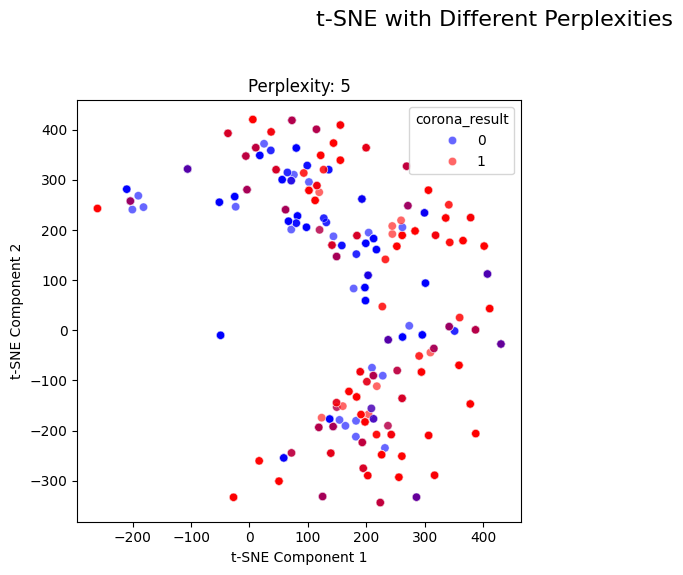

In [32]:
plot_tsne_covid(df_filtered.loc["2020-03-11":"2020-03-21"], labels_col="corona_result", perplexities=[5])

In [172]:
def plot_tsne_covid(df, labels_col="corona_result", perplexities=[100, 200, 400]):
    # Mapping for test_indication
    test_indication_mapping = {
        1: "Other",
        2: "Abroad",
        3: "Contact with confirmed"
    }
    
    pca = PCA(n_components=6)
    pca_result = pca.fit_transform(df.drop(columns=[labels_col]))
    
    n_cols = 2
    n_rows = (len(perplexities) + 1) // n_cols
    
    fig = make_subplots(
        rows=n_rows, cols=n_cols, 
        subplot_titles=[f'Perplexity: {p}' for p in perplexities]
    )
    
    for idx, perplexity in enumerate(perplexities):
        tsne = TSNE(
            n_components=2, 
            perplexity=perplexity, 
            random_state=101,
            n_jobs=-1
        )
        tsne_result = tsne.fit_transform(pca_result)
        
        # Create a copy to avoid the SettingWithCopyWarning
        df_copy = df.copy()
        df_copy.loc[:, 'TSNE1'] = tsne_result[:, 0]
        df_copy.loc[:, 'TSNE2'] = tsne_result[:, 1]
        
        # Create customdata array with concatenated features with values
        customdata = []
        for i, row in df_copy.iterrows():
            # Replace test_indication with original labels for hover data only
            test_indication_label = test_indication_mapping.get(row['test_indication'], row['test_indication'])
            
            # Filtered data excluding TSNE1, TSNE2, labels_col, and ensuring val > 0
            filtered_data = [f'{col}: {val}' for col, val in row.drop(['TSNE1', 'TSNE2', labels_col]).items() if val > 0 and col != 'test_indication']
            
            # Append test_indication separately if it exists in the mapping
            if test_indication_label:
                filtered_data.append(f'test_indication: {test_indication_label}')
            
            # Join into customdata string
            customdata.append('<br>'.join(filtered_data))
        
        row = (idx // n_cols) + 1
        col = (idx % n_cols) + 1
        
        fig.add_trace(
            go.Scatter(
                x=df_copy['TSNE1'],
                y=df_copy['TSNE2'],
                mode='markers',
                marker=dict(
                    color=df_copy[labels_col].map({0: 'blue', 1: 'red'}),
                    opacity=0.6
                ),
                text=df_copy[labels_col],
                customdata=customdata,
                hovertemplate="%{customdata}",
                showlegend=False
            ),
            row=row, col=col
        )
    
    fig.update_layout(
        height=600 * n_rows, width=1000,
        title_text='t-SNE with Different Perplexities',
        showlegend=False
    )
    
    fig.show()


In [177]:
plot_tsne_covid(df_filtered.loc["2020-03-11":"2020-03-21"], labels_col="corona_result", perplexities=[100])

In [178]:
plot_tsne_covid(df_filtered.loc["2020-03-11":"2020-03-21"], labels_col="corona_result", perplexities=[200])

In [179]:
plot_tsne_covid(df_filtered.loc["2020-03-11":"2020-03-21"], labels_col="corona_result", perplexities=[400])

In [180]:
plot_tsne_covid(df_filtered.loc["2020-03-11":"2020-03-21"], labels_col="corona_result", perplexities=[800])

In [181]:
plot_tsne_covid(df_filtered.loc["2020-03-11":"2020-03-21"], labels_col="corona_result", perplexities=[1600])

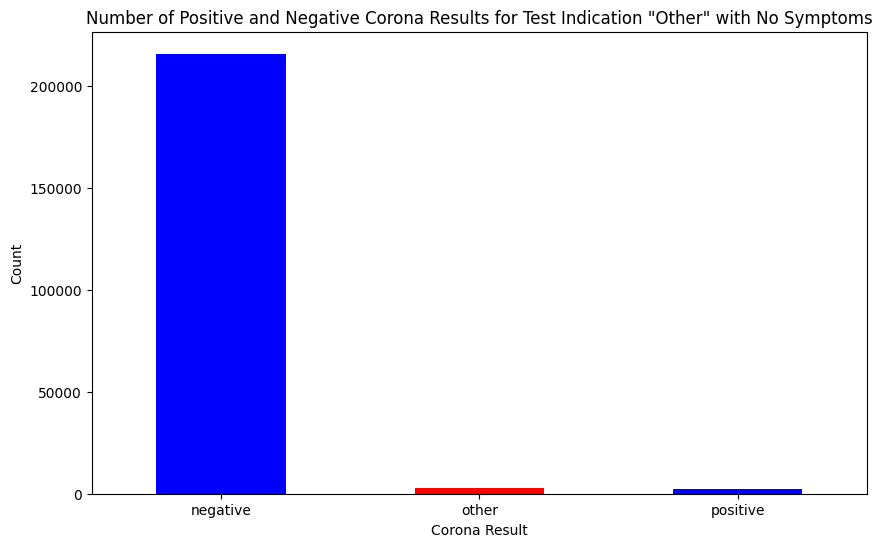

In [185]:
filtered_df = df[df['test_indication'] == 'Other']

# Further filter for rows where all symptom columns are 0
symptom_cols = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']
filtered_df = filtered_df[(filtered_df[symptom_cols] == 0).all(axis=1)]

# Group by corona_result and count occurrences
corona_counts = filtered_df['corona_result'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
corona_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Positive and Negative Corona Results for Test Indication "Other" with No Symptoms')
plt.xlabel('Corona Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [184]:
filtered_df

cough  fever  sore_throat  shortness_of_breath  head_ache  \
test_date                                                               
2020-03-11    0.0    0.0          0.0                  0.0        0.0   
2020-03-11    1.0    0.0          0.0                  0.0        0.0   
2020-03-11    1.0    0.0          0.0                  0.0        0.0   
2020-03-11    0.0    0.0          0.0                  1.0        0.0   
2020-03-11    1.0    0.0          0.0                  0.0        0.0   
...           ...    ...          ...                  ...        ...   
2020-04-30    0.0    0.0          0.0                  0.0        0.0   
2020-04-30    0.0    0.0          0.0                  0.0        0.0   
2020-04-30    0.0    0.0          0.0                  0.0        0.0   
2020-04-30    0.0    0.0          0.0                  0.0        0.0   
2020-04-30    0.0    0.0          0.0                  0.0        0.0   

           corona_result age_60_and_above  gender test_indication  
test_date                                                          
2020-03-11      negative              NaN     NaN           Other  
2020-03-11      negative              NaN     NaN           Other  
2020-03-11      negative              NaN     NaN           Other  
2020-03-11      negative              NaN     NaN           Other  
2020-03-11      negative              NaN     NaN           Other  
...                  ...              ...     ...             ...  
2020-04-30      negative              NaN  female           Other  
2020-04-30      negative              NaN    male           Other  
2020-04-30      negative              NaN  female           Other  
2020-04-30      negative              NaN  female           Other  
2020-04-30      negative              NaN  female           Other  

[242741 rows x 9 columns]